# r.earthworks

This notebook runs the example from r.earthworks's manual page and visualizes the output.

## Setup

We will be using the NC SPM sample location.

In [21]:
import os
import json
import subprocess
import sys

# ask GRASS GIS where its Python packages are
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# import GRASS packages
import grass.script as gs
import grass.jupyter as gj

## start GRASS session
session = gj.init("~/grassdata/nc_spm_08_grass7/user1")

## start GRASS session
#gj.init("~/data/grassdata/nc_basic_spm_grass7/user1")

## Install

In [22]:
# install addon
gs.run_command(
    "g.extension",
    extension="r.earthworks",
    url="https://github.com/baharmon/r.earthworks"
)

## Operations

Set the computational region and generate a flat terrain with map algebra.

In [23]:
# set region
gs.run_command('g.region', n=1000, e=1000, s=0, w=0, res=1)

# generate elevation
gs.mapcalc('elevation = 0')

### Fill Operation
Model a peak from a set of x- and y-coordinates with `r.earthworks`. Use the `z` parameter to set a z-coordinate for the top of the peak. Optionally use the `flat` parameter to create a plateau at the top of the peak. 

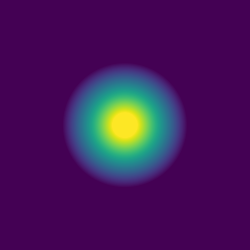

In [24]:
# model earthworks
gs.run_command(
    'r.earthworks',
    elevation='elevation',
    earthworks='peak',
    operation='fill',
    coordinates=[500,500],
    z=100,
    flat=50,
    rate=0.5
)

# visualize
m = gj.Map(width=250)
m.d_rast(map="peak")
m.show()

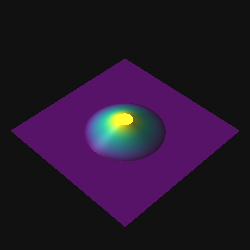

In [5]:
# visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(elevation_map="peak", height=2500, perspective=25, bgcolor=[17, 17, 17])
map3d.show()

### Cut Operation
Model a pit from a set of x- and y-coordinates with `r.earthworks`. Set a z-coordinate for the bottom of the pit.

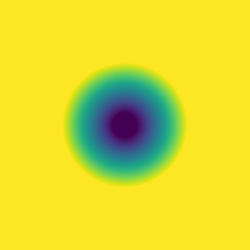

In [6]:
# model earthworks
gs.run_command(
    'r.earthworks',
    elevation='elevation',
    earthworks='pit',
    operation='cut',
    coordinates=[500,500],
    z=-100,
    flat=50,
    rate=0.5
)

# visualize
m = gj.Map(width=250)
m.d_rast(map="pit")
m.show()

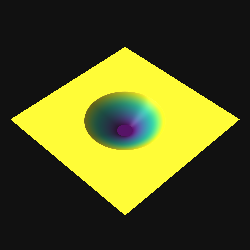

In [7]:
# visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(elevation_map="pit", height=2500, perspective=25, bgcolor=[17, 17, 17])
map3d.show()

### Cut & Fill Operation
Model a pit and a peak from two sets of x- and y-coordinates with `r.earthworks`. Set a z-coordinate for the bottom of the pit and another z-coordinate for the top of the peak.

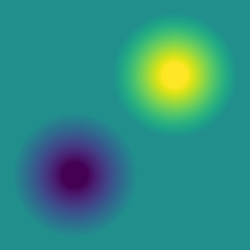

In [27]:
# model earthworks
gs.run_command(
    'r.earthworks',
    elevation='elevation',
    earthworks='pit_and_peak',
    operation='cutfill',
    coordinates=[300,300,700,700],
    z=[-100,100],
    flat=50,
    rate=0.5
)

# visualize
m = gj.Map(width=250)
m.d_rast(map="pit_and_peak")
m.show()

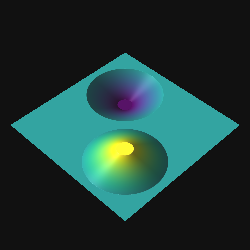

In [28]:
# visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(elevation_map="pit_and_peak", height=2500, perspective=25, bgcolor=[17, 17, 17])
map3d.show()

### Random Earthworks
Model random pits and peaks with `r.random` and `r.earthworks`.

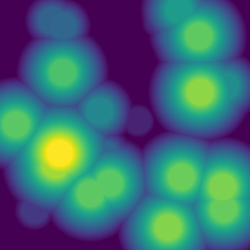

In [8]:
# generate random points
gs.run_command(
    'r.surf.random',
    out='surface',
    min=0,
    max=100
)
gs.run_command(
    'r.random',
    input='elevation',
    npoints=25,
    cover='surface',
    raster='random',
    flags='s'
)

# model earthworks
gs.run_command(
    'r.earthworks',
    elevation='elevation',
    earthworks='random_earthworks',
    operation='fill',
    raster='random',
    rate=0.5,
    flat=50,
)

# visualize
m = gj.Map(width=250)
m.d_rast(map="random_earthworks")
m.show()

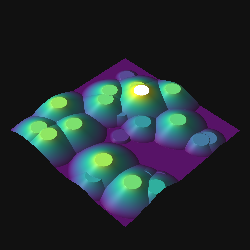

In [9]:
# visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(elevation_map="random_earthworks", height=2500, zexag=1, perspective=25, bgcolor=[17, 17, 17])
map3d.show()

## Testing

fill operation


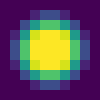

In [20]:
# setup
gs.run_command('g.region', n=10, e=10, s=0, w=0, res=1)
gs.mapcalc('test_input = 0')

# test fill
gs.run_command(
    'r.earthworks',
    elevation='test_input',
    earthworks='test_output',
    coordinates=[5,5],
    operation='fill',
    z=1,
    flat=2,
    rate=0.5
)
print('fill operation')

# visualize
m = gj.Map(width=100)
m.d_rast(map="test_output")
m.show()

cut operation


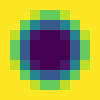

In [13]:
# test cut
gs.run_command(
    'r.earthworks',
    elevation='test_input',
    earthworks='test_output',
    coordinates=[5,5],
    operation='cut',
    z=-1,
    flat=2,
    rate=0.5
)
print('cut operation')

# visualize
m = gj.Map(width=100)
m.d_rast(map="test_output")
m.show()

cut & fill operation


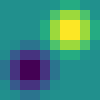

In [17]:
# test cut & fill
gs.run_command(
    'r.earthworks',
    elevation='test_input',
    earthworks='test_output',
    coordinates=[3,3,7,7],
    operation='cutfill',
    z=[-1,1],
    flat=1,
    rate=0.5
)
print('cut & fill operation')

# visualize
m = gj.Map(width=100)
m.d_rast(map="test_output")
m.show()